__Clean, Transform, Merge and Reshape__

Pandas provides a high-level, flexible, and high-performance set of core manipulations and algorithms to enable you to wrangle data into the right form.

# Combining and Merging Data Sets

`pandas.merge` connects rows in DataFrame based on one or more keys.

`pandas.concat` stacks together objects along an axis.

`combine_first` instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Database-style DataFrame Merges

In [30]:
left = pd.DataFrame({'data1' : np.random.randint(100, 200, 8), 'key' : list('bacbaacb')})
right = pd.DataFrame({'data2' : np.random.randint(10, 99, 7), 'key' : list('acaacdd')})
right


,data2,key
0,93,a
1,31,c
2,49,a
3,53,a
4,46,c
5,86,d
6,43,d


In [31]:
left.merge(right)

,data1,key,data2
0,147,a,93
1,147,a,49
2,147,a,53
3,135,a,93
4,135,a,49
5,135,a,53
6,189,a,93
7,189,a,49
8,189,a,53
9,120,c,31


In [32]:
pd.merge(left, right, on = 'key')

,data1,key,data2
0,147,a,93
1,147,a,49
2,147,a,53
3,135,a,93
4,135,a,49
5,135,a,53
6,189,a,93
7,189,a,49
8,189,a,53
9,120,c,31


By default, `merge` does an 'inner' join (intersection). Other possibilities are `left`, `right`, and `outer`

In [33]:
left.merge(right, how = 'left')
# or pd.merge(left,right, how = 'left')

,data1,key,data2
0,158,b,NaN
1,147,a,93.0
2,147,a,49.0
3,147,a,53.0
4,120,c,31.0
5,120,c,46.0
6,158,b,NaN
7,135,a,93.0
8,135,a,49.0
9,135,a,53.0


In [34]:
left.merge(right, how = 'outer')


,data1,key,data2
0,158.0,b,NaN
1,158.0,b,NaN
2,180.0,b,NaN
3,147.0,a,93.0
4,147.0,a,49.0
5,147.0,a,53.0
6,135.0,a,93.0
7,135.0,a,49.0
8,135.0,a,53.0
9,189.0,a,93.0


It returns the carteasian product of the elements with common keys, if there are duplicates, then it will return all the posible combinations.

If columns don't have the same name, or we want to join the index of the DataFrames, we will need to specify that.

In [35]:
right.columns = ['a', 'b']
left.merge(right, left_on = ['key'], right_on = ['b'])

,data1,key,a,b
0,147,a,93,a
1,147,a,49,a
2,147,a,53,a
3,135,a,93,a
4,135,a,49,a
5,135,a,53,a
6,189,a,93,a
7,189,a,49,a
8,189,a,53,a
9,120,c,31,c


If there are two columns with the same name that we do not join on, both will get transferred to the resulting DataFrame with a suffix. We can customize these suffixes.

In [36]:
right.columns = ['data1', 'key']
left.merge(right, left_on=['key'], right_on=['key'])

,data1_x,key,data1_y
0,147,a,93
1,147,a,49
2,147,a,53
3,135,a,93
4,135,a,49
5,135,a,53
6,189,a,93
7,189,a,49
8,189,a,53
9,120,c,31


In [37]:
left.merge(right, left_on=['key'], right_on=['key'], suffixes=['_chachi', '_piruli'])

,data1_chachi,key,data1_piruli
0,147,a,93
1,147,a,49
2,147,a,53
3,135,a,93
4,135,a,49
5,135,a,53
6,189,a,93
7,189,a,49
8,189,a,53
9,120,c,31


## Merging on Index

``left_index = True`` or ``right_index = True`` (or both) to indicate that the index should be used as the merge key.

In [38]:
right.index = list('abdoier')
right

,data1,key
a,93,a
b,31,c
d,49,a
o,53,a
i,46,c
e,86,d
r,43,d


In [39]:
left.merge(right, left_on = 'key', right_index = True, how = 'outer')

,key,data1_x,key_x,data1_y,key_y
0.0,b,158.0,b,31.0,c
3.0,b,158.0,b,31.0,c
7.0,b,180.0,b,31.0,c
1.0,a,147.0,a,93.0,a
4.0,a,135.0,a,93.0,a
5.0,a,189.0,a,93.0,a
2.0,c,120.0,c,NaN,NaN
6.0,c,140.0,c,NaN,NaN
NaN,d,NaN,NaN,49.0,a
NaN,o,NaN,NaN,53.0,a


## Concatenating along an axis

Use ``concatenate`` function

In [40]:
pd.concat([left, right])

,data1,key
0,158,b
1,147,a
2,120,c
3,158,b
4,135,a
5,189,a
6,140,c
7,180,b
a,93,a
b,31,c


By default `concat` works along axis=0 producing another Series. With axis=1, the result is a DataFrame.

In [41]:
pd.concat([left, right], axis = 1)

,data1,key,data1,key
0,158.0,b,NaN,NaN
1,147.0,a,NaN,NaN
2,120.0,c,NaN,NaN
3,158.0,b,NaN,NaN
4,135.0,a,NaN,NaN
5,189.0,a,NaN,NaN
6,140.0,c,NaN,NaN
7,180.0,b,NaN,NaN
a,NaN,NaN,93.0,a
b,NaN,NaN,31.0,c


DataFrames in which the row index does not contain any relevant data can be ignored with ``ignore_index = True``

In [42]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns = ['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns = ['b', 'd', 'a'])

pd.concat([df1, df2], ignore_index = True)

,a,b,c,d
0,0.120008,-0.334133,-1.603482,0.423033
1,-1.665532,-0.180863,-1.501919,-0.439324
2,0.352375,1.614360,0.803241,-1.227213
3,1.174486,-0.566006,NaN,0.540353
4,-0.541470,-0.488286,NaN,-1.191316


# Reshaping and Pivoting

Number of basic operations for rearranging tabular data.

## Reshaping with Hierarchical Indexing

``stack`` rotates or pivots from the columns in the data to the rows.

``unstack`` pivots from the rows into the columns.

In [27]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                   index = pd.Index(['Ohio', 'Colorado'], name = 'state'),
                   columns = pd.Index(['one', 'two', 'three'],
                                     name = 'number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [28]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [29]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [37]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [38]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [40]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                 columns = pd.Index(['left', 'right'], name = 'side'))

df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [46]:
df.unstack(0).stack(0)

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Example

Data from https://www.transtats.bts.gov/

In [1]:
!unzip /home/dsc/Downloads/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip

Archive:  /home/dsc/Downloads/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip
  inflating: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv  
  inflating: readme.html             


In [4]:
!head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	Reporting Carrier On-Time Performance (1987-present) data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


We can display the contents of the __readme.html__ within the notebook with Ipython.display.IFrame

In [57]:
from IPython.display import IFrame
import pandas as pd

IFrame('http://elpais.com', 800, 300)

In [58]:
IFrame('readme.html', 800, 300)

We can open the files without decompressing them. Use [zipfile](https://docs.python.org/3/library/zipfile.html)

In [2]:
from zipfile import ZipFile

zfile = ZipFile('/home/dsc/Downloads/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip')
zfile.filelist

[<ZipInfo filename='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv' compress_type=deflate filemode='-rw-r--r--' file_size=284488780 compress_size=30367345>,
 <ZipInfo filename='readme.html' compress_type=deflate filemode='-rw-r--r--' file_size=12152 compress_size=2244>]

zip_file connect the compressed file. We can use it to open a connection to one of the files it contains.

In [3]:
csvfile = zfile.open(zfile.filelist[0])
csvfile.readline()

b'"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","Reporting_Airline","DOT_ID_Reporting_Airline","IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","Div

Now we can load the file into memory as a pandas dataframe. Remember to close the connection to the files.

In [4]:
flights = pd.read_csv(csvfile)

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.options.display.max_columns = None

flights.shape

(648228, 110)

In [6]:
flights.sample(4)

,2020,1,3,9,1.1,2020-03-09,9E,20363,9E.1,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412,-11.00,0.00,0.00.1,-1,1400-1459,16.00,1428,1552,5.00,1615,1557,-18.00,0.00.2,0.00.3,-2,1600-1659,0.00.4,Unnamed: 48,0.00.5,112.00,105.00,84.00,1.00,615.00,3.1,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,0,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
231359,2020,1,3,23,1,2020-03-23,DL,19790,DL,N550NW,2494,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,1218,NaN,NaN,NaN,NaN,NaN,1200-1259,NaN,NaN,NaN,NaN,1410,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,D,0.0,112.0,NaN,NaN,1.0,581.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303630,2020,1,3,17,2,2020-03-17,MQ,20398,MQ,N677AE,3973,11996,1199603,31871,GSP,"Greer, SC",SC,45,South Carolina,37,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,735,729.0,-6.0,0.0,0.0,-1.0,0700-0759,32.0,801.0,837.0,12.0,852,849.0,-3.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,137.0,140.0,96.0,1.0,577.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463287,2020,1,3,2,1,2020-03-02,YX,20452,YX,N119HQ,4460,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42,Pennsylvania,23,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,600,552.0,-8.0,0.0,0.0,-1.0,0600-0659,16.0,608.0,705.0,8.0,740,713.0,-27.0,0.0,0.0,-2.0,0700-0759,0.0,NaN,0.0,100.0,81.0,57.0,1.0,335.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62928,2020,1,3,12,4,2020-03-12,AA,19805,AA,N537UW,1770,14635,1463502,31714,RSW,"Fort Myers, FL",FL,12,Florida,33,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,651,645.0,-6.0,0.0,0.0,-1.0,0600-0659,10.0,655.0,824.0,13.0,850,837.0,-13.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,119.0,112.0,89.0,1.0,600.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import time
import tqdm

x = 0

for i in tqdm.tqdm(range(100)):
    time.sleep(.01)
    x += i
    
i

100%|██████████| 100/100 [00:01<00:00, 86.67it/s]


99

In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648228 entries, 0 to 648227
Columns: 110 entries, 2020 to Unnamed: 109
dtypes: float64(71), int64(20), object(19)
memory usage: 544.0+ MB


Let's load March and April 2020 into a single DataFrame

In [9]:
dfs = []

for name in ['/home/dsc/Downloads/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip',
             '/home/dsc/Downloads/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip']:
    zfile = ZipFile(name)
    csv = zfile.open(zfile.filelist[0])
    dfs.append(pd.read_csv(csv))
    csv.close()
    zfile.close()

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
flights = pd.concat(dfs)

In [11]:
flights.shape

(961611, 110)

In [12]:
flights.iloc[:0]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109


Be careful when reassigning variables to reserved words or functions.
Do not flight.mean = something.

In [13]:
flights.mean

<bound method DataFrame.mean of         Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2020        1      3           9          1  2020-03-09   
1       2020        1      3           9          1  2020-03-09   
2       2020        1      3           7          6  2020-03-07   
3       2020        1      3           7          6  2020-03-07   
4       2020        1      3           7          6  2020-03-07   
...      ...      ...    ...         ...        ...         ...   
313377  2020        2      4           1          3  2020-04-01   
313378  2020        2      4           1          3  2020-04-01   
313379  2020        2      4           1          3  2020-04-01   
313380  2020        2      4           1          3  2020-04-01   
313381  2020        2      4           1          3  2020-04-01   

       Reporting_Airline  DOT_ID_Reporting_Airline  \
0                     9E                     20363   
1                     9E                     20363   
2

# Data Transformation

## Removing Duplicates

In [43]:
left

,data1,key
0,158,b
1,147,a
2,120,c
3,158,b
4,135,a
5,189,a
6,140,c
7,180,b


In [44]:
left.drop_duplicates(subset = ['key'], keep = 'last')

,data1,key
5,189,a
6,140,c
7,180,b


__Exercise__

How many individual airports are there?

In [14]:
pd.options.display.max_columns = None
flights.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
383228,2020,1,3,29,7,2020-03-29,WN,19393,WN,N950WN,4998,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,2005,2001.0,-4.0,0.0,0.0,-1.0,2000-2059,8.0,2009.0,2046.0,9.0,2100,2055.0,-5.0,0.0,0.0,-1.0,2100-2159,0.0,NaN,0.0,115.0,114.0,97.0,1.0,602.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25007,2020,1,3,22,7,2020-03-22,9E,20363,9E,N391CA,5396,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,14524,1452401,34524,RIC,"Richmond, VA",VA,51,Virginia,38,1247,1243.0,-4.0,0.0,0.0,-1.0,1200-1259,13.0,1256.0,1606.0,5.0,1621,1611.0,-10.0,0.0,0.0,-1.0,1600-1659,0.0,NaN,0.0,154.0,148.0,130.0,1.0,970.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497481,2020,1,3,17,2,2020-03-17,OH,20397,OH,N558NN,5084,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,15412,1541205,35412,TYS,"Knoxville, TN",TN,47,Tennessee,54,930,917.0,-13.0,0.0,0.0,-1.0,0900-0959,24.0,941.0,1019.0,3.0,1040,1022.0,-18.0,0.0,0.0,-2.0,1000-1059,0.0,NaN,0.0,70.0,65.0,38.0,1.0,177.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5737,2020,1,3,18,3,2020-03-18,9E,20363,9E,N916XJ,4887,12884,1288403,32884,LAN,"Lansing, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,515,506.0,-9.0,0.0,0.0,-1.0,0001-0559,13.0,519.0,543.0,9.0,620,552.0,-28.0,0.0,0.0,-2.0,0600-0659,0.0,NaN,0.0,65.0,46.0,24.0,1.0,74.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183991,2020,1,3,6,5,2020-03-06,DL,19790,DL,N311DN,833,14679,1467903,33570,SAN,"San Diego, CA",CA,6,California,91,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1205,1204.0,-1.0,0.0,0.0,-1.0,1200-1259,22.0,1226.0,1921.0,10.0,1928,1931.0,3.0,3.0,0.0,0.0,1900-1959,0.0,NaN,0.0,263.0,267.0,235.0,1.0,1956.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [15]:
flights['Origin'].nunique()

353

In [16]:
flights.drop_duplicates(subset = 'Origin').shape

(353, 110)

How many routes (combinations of origin / destination)?

In [17]:
flights.drop_duplicates(subset = ['Origin', 'Dest']).shape

(5844, 110)

In [18]:
(flights['Origin'] + '-' + flights['Dest']).nunique()

5844

## Renaming axis indexes

In [49]:
left.index = list('abcdefgh')
left

,data1,key
a,158,b
b,147,a
c,120,c
d,158,b
e,135,a
f,189,a
g,140,c
h,180,b


In [50]:
left.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='object')

## Discretization and binning

In [51]:
incognito = pd.cut(flights['Distance'], range(100, 2000, 500))
incognito

0          (600, 1100]
1          (600, 1100]
2           (100, 600]
3           (100, 600]
4           (100, 600]
              ...     
313377    (1100, 1600]
313378      (100, 600]
313379      (100, 600]
313380      (100, 600]
313381     (600, 1100]
Name: Distance, Length: 961611, dtype: category
Categories (3, interval[int64]): [(100, 600] < (600, 1100] < (1100, 1600]]

In [53]:
incognito = pd.cut(flights['Distance'], 10)
incognito

0          (537.4, 1043.8]
1          (537.4, 1043.8]
2          (25.936, 537.4]
3          (25.936, 537.4]
4          (25.936, 537.4]
                ...       
313377    (1043.8, 1550.2]
313378     (25.936, 537.4]
313379     (25.936, 537.4]
313380     (25.936, 537.4]
313381     (537.4, 1043.8]
Name: Distance, Length: 961611, dtype: category
Categories (10, interval[float64]): [(25.936, 537.4] < (537.4, 1043.8] < (1043.8, 1550.2] < (1550.2, 2056.6] ... (3069.4, 3575.8] < (3575.8, 4082.2] < (4082.2, 4588.6] < (4588.6, 5095.0]]

In [54]:
incognito.value_counts()

(25.936, 537.4]     390299
(537.4, 1043.8]     341401
(1043.8, 1550.2]    136322
(1550.2, 2056.6]     48376
(2056.6, 2563.0]     35064
(2563.0, 3069.4]      8898
(3575.8, 4082.2]       570
(3069.4, 3575.8]       249
(4082.2, 4588.6]       230
(4588.6, 5095.0]       202
Name: Distance, dtype: int64

In [55]:
ages = np.random.randint(0, 99, size = 25)
pd.cut(ages, [0, 2, 12, 19, 35, 65, 100]).value_counts()

(0, 2]        0
(2, 12]       0
(12, 19]      2
(19, 35]      3
(35, 65]      8
(65, 100]    12
dtype: int64

## String manipulation

### String object methods

In [57]:
animals = pd.Series('fairy goblin orc elf mamoth narwhal'.split())
animals

0      fairy
1     goblin
2        orc
3        elf
4     mamoth
5    narwhal
dtype: object

In [58]:
animals.str.len()

0    5
1    6
2    3
3    3
4    6
5    7
dtype: int64

In [59]:
animals.str.capitalize()

0      Fairy
1     Goblin
2        Orc
3        Elf
4     Mamoth
5    Narwhal
dtype: object

In [60]:
animals.str.upper()

0      FAIRY
1     GOBLIN
2        ORC
3        ELF
4     MAMOTH
5    NARWHAL
dtype: object

In [61]:
animals.str[0]

0    f
1    g
2    o
3    e
4    m
5    n
dtype: object

### Vectorized string functions in Pandas

There are two ways to store text data in Pandas:

- 1. object -dtype Numpy array
- 2. StringDtype extension type (this is the case)

The string attributes have the same names as the regular Python string functions, but work on Series of strings.

__Exercise__

Generate a list of the columns that have 'Origin' in their name

In [19]:
flights.columns[flights.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [20]:
flights[flights.columns[flights.columns.str.contains('Origin')]].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
120967,13873,1387305,33873,OME,"Nome, AK",AK,2,Alaska,1
492409,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41
641892,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
452300,11481,1148102,31481,ECP,"Panama City, FL",FL,12,Florida,33
7925,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74


If we filter the interesting columns we want

In [21]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

flights = flights[interesting_columns]

In [22]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961611 entries, 0 to 313381
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   FlightDate                       961611 non-null  object 
 1   DayOfWeek                        961611 non-null  int64  
 2   Reporting_Airline                961611 non-null  object 
 3   Tail_Number                      822783 non-null  object 
 4   Flight_Number_Reporting_Airline  961611 non-null  int64  
 5   Origin                           961611 non-null  object 
 6   OriginCityName                   961611 non-null  object 
 7   OriginStateName                  961611 non-null  object 
 8   OriginCityMarketID               961611 non-null  int64  
 9   Dest                             961611 non-null  object 
 10  DestCityName                     961611 non-null  object 
 11  DestStateName                    961611 non-null  object 
 12  De

# Data Aggregation and Group Operations

## GroupBy mechanics

In [26]:
left = pd.DataFrame({'data1' : np.random.randint(100, 200, 8), 'key' : list('bacbaacb')})
right = pd.DataFrame({'data2' : np.random.randint(10, 99, 7), 'key' : list('acaacdd')})
left

,data1,key
0,117,b
1,138,a
2,183,c
3,138,b
4,120,a
5,126,a
6,176,c
7,124,b


In [27]:
left.groupby('key')

In [28]:
left.groupby('key').count()

,data1
key,
a,3
b,3
c,2


In [29]:
left.groupby('key').mean()

,data1
key,
a,128.000000
b,126.333333
c,179.500000


In [34]:
flights.groupby('Origin').count()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
Origin,,,,,,,,,,,,,,,,
ABE,687,687,687,490,687,687,687,687,687,687,687,687,467,467,467,687
ABI,317,317,317,287,317,317,317,317,317,317,317,317,265,265,265,317
ABQ,3435,3435,3435,2788,3435,3435,3435,3435,3435,3435,3435,3435,2483,2483,2481,3435
ABR,122,122,122,122,122,122,122,122,122,122,122,122,115,115,115,122
ABY,139,139,139,139,139,139,139,139,139,139,139,139,121,121,120,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRG,122,122,122,122,122,122,122,122,122,122,122,122,119,119,117,122
XNA,1891,1891,1891,1636,1891,1891,1891,1891,1891,1891,1891,1891,1436,1436,1434,1891
XWA,139,139,139,139,139,139,139,139,139,139,139,139,124,124,124,139


In [39]:
flights['FlightDate'].str[-5:-3]

0         03
1         03
2         03
3         03
4         03
          ..
313377    04
313378    04
313379    04
313380    04
313381    04
Name: FlightDate, Length: 961611, dtype: object

In [40]:
flights.groupby(flights['FlightDate'].str[-5:-3]).count()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
FlightDate,,,,,,,,,,,,,,,,,
03,648229,648229,648229,599908,648229,648229,648229,648229,648229,648229,648229,648229,648229,538275,538273,537244,648229
04,313382,313382,313382,222875,313382,313382,313382,313382,313382,313382,313382,313382,313382,183383,183383,183006,313382


In [41]:
flights.groupby(['Origin', 'Dest']).count()

FlightDate  DayOfWeek  Reporting_Airline  Tail_Number  \
Origin Dest                                                          
ABE    ATL           87         87                 87           74   
       BNA           15         15                 15            6   
       CLT          183        183                183          122   
       DTW          120        120                120          120   
       FLL           13         13                 13            6   
...                 ...        ...                ...          ...   
XWA    MSP           92         92                 92           92   
YAK    CDV           61         61                 61           61   
       JNU           61         61                 61           61   
YUM    DFW           61         61                 61           61   
       PHX          215        215                215          180   

             Flight_Number_Reporting_Airline  OriginCityName  OriginStateName  \
Origin Dest                                                                     
ABE    ATL                                87              87               87   
       BNA                                15              15               15   
       CLT                               183             183              183   
       DTW                               120             120              120   
       FLL                                13              13               13   
...                                      ...             ...              ...   
XWA    MSP                                92              92               92   
YAK    CDV                                61              61               61   
       JNU                                61              61               61   
YUM    DFW                                61              61               61   
       PHX                               215             215              215   

             OriginCityMarketID  DestCityName  DestStateName  \
Origin Dest                                                    
ABE    ATL                   87            87             87   
       BNA                   15            15             15   
       CLT                  183           183            183   
       DTW                  120           120            120   
       FLL                   13            13             13   
...                         ...           ...            ...   
XWA    MSP                   92            92             92   
YAK    CDV                   61            61             61   
       JNU                   61            61             61   
YUM    DFW                   61            61             61   
       PHX                  215           215            215   

             DestCityMarketID  DepTime  DepDelay  AirTime  Distance  
Origin Dest                                                          
ABE    ATL                 87       61        61       61        87  
       BNA                 15        6         6        6        15  
       CLT                183      119       119      119       183  
       DTW                120      115       115      115       120  
       FLL                 13        6         6        6        13  
...                       ...      ...       ...      ...       ...  
XWA    MSP                 92       90        90       90        92  
YAK    CDV                 61       58        58       58        61  
       JNU                 61       57        57       57        61  
YUM    DFW                 61       61        61       61        61  
       PHX                215      156       156      156       215  

[5844 rows x 15 columns]

### Iterating over groups

In [42]:
for id_, group in left.groupby('key'):
    print(id_)
    print(group.shape)

a
(3, 2)
b
(3, 2)
c
(2, 2)


### Selecting a column or subset of columns

In [43]:
flights.groupby(['Origin', 'Dest'])['AirTime'].mean()

Origin  Dest
ABE     ATL     106.163934
        BNA     101.500000
        CLT      89.436975
        DTW      78.773913
        FLL     139.833333
                   ...    
XWA     MSP      75.955556
YAK     CDV      38.172414
        JNU      34.736842
YUM     DFW     124.426230
        PHX      32.012821
Name: AirTime, Length: 5844, dtype: float64

## Data Agreggation

In [44]:
flights.groupby(['Origin', 'Dest'])['AirTime'].agg(['mean', 'std'])

mean       std
Origin Dest                      
ABE    ATL   106.163934  7.842577
       BNA   101.500000  3.146427
       CLT    89.436975  8.872581
       DTW    78.773913  7.449315
       FLL   139.833333  9.196014
...                 ...       ...
XWA    MSP    75.955556  3.842141
YAK    CDV    38.172414  1.974735
       JNU    34.736842  3.073657
YUM    DFW   124.426230  7.161143
       PHX    32.012821  3.452885

[5844 rows x 2 columns]

### Columns-wise and multiple function application

In [49]:
groupby = flights.groupby(['Origin', 'Dest'])['AirTime']
groupby.agg(lambda series: series.max() - series.min())

Origin  Dest
ABE     ATL     39.0
        BNA      9.0
        CLT     45.0
        DTW     36.0
        FLL     27.0
                ... 
XWA     MSP     20.0
YAK     CDV     10.0
        JNU     22.0
YUM     DFW     28.0
        PHX     24.0
Name: AirTime, Length: 5844, dtype: float64

In [51]:
time_route = flights.groupby(['Origin', 'Dest']).agg({'AirTime': ['mean', 'std'], 'Distance': 'min'})
time_route

AirTime           Distance
                   mean       std      min
Origin Dest                               
ABE    ATL   106.163934  7.842577    692.0
       BNA   101.500000  3.146427    685.0
       CLT    89.436975  8.872581    481.0
       DTW    78.773913  7.449315    425.0
       FLL   139.833333  9.196014   1041.0
...                 ...       ...      ...
XWA    MSP    75.955556  3.842141    553.0
YAK    CDV    38.172414  1.974735    213.0
       JNU    34.736842  3.073657    198.0
YUM    DFW   124.426230  7.161143   1022.0
       PHX    32.012821  3.452885    160.0

[5844 rows x 3 columns]

In [53]:
time_route.sort_values(by = ('AirTime', 'mean'))

AirTime           Distance
                  mean       std      min
Origin Dest                              
WRG    PSG   11.344828  2.705107     31.0
PSG    WRG   11.800000  2.569706     31.0
SJU    STT   16.298851  1.249325     68.0
SFO    STS   16.446809  1.652515     66.0
IAD    MDT   18.000000       NaN     94.0
...                ...       ...      ...
PHX    LGA         NaN       NaN   2149.0
PNS    MCI         NaN       NaN    743.0
SMF    EWR         NaN       NaN   2500.0
TTN    MIA         NaN       NaN   1047.0
VPS    IND         NaN       NaN    637.0

[5844 rows x 3 columns]

__Exercise__

Which plane has the highest average delay?

We'll first group by `Tail_Number` and then calculate the relevant statistic for each group.

1. Get average delays for each plane, then show the top 10

2. Get both average delay and number of flights. Show the 10 planes with the most flights

3. Get both average delay and number of flights.  Show the 10 planes with the worst delays from those that had at least 10 flights.

1.

In [56]:
flights.groupby('Tail_Number')['DepDelay'].mean().sort_values(ascending=False).head(10)

Tail_Number
N669UA    199.000000
N2142U    190.000000
N762AN     73.000000
N388AA     61.736842
N343AN     61.400000
N112AN     58.750000
N204UA     55.866667
N447UA     53.727273
N216UA     51.500000
N234JQ     50.333333
Name: DepDelay, dtype: float64

2.

In [57]:
delays = flights.groupby('Tail_Number')['DepDelay'].agg(['mean', 'count'])
delays.sort_values(by = 'count', ascending = False).head(10)

,mean,count
Tail_Number,,
N494HA,-3.450667,375
N615AS,-8.239892,371
N493HA,-4.204986,361
N484HA,-2.836620,355
N488HA,-3.448276,348
N618AS,-6.438596,342
N644AS,-2.377193,342
N485HA,-2.911504,339
N479HA,-3.924925,333


3.

In [59]:
delays.sort_values(by = 'mean', ascending = False).head(10)

,mean,count
Tail_Number,,
N669UA,199.000000,1
N2142U,190.000000,2
N762AN,73.000000,1
N388AA,61.736842,19
N343AN,61.400000,25
N112AN,58.750000,12
N204UA,55.866667,30
N447UA,53.727273,22
N216UA,51.500000,10


In [60]:
delays[delays['count'] > 10].sort_values(by = 'mean', ascending = False).head(10)

,mean,count
Tail_Number,,
N388AA,61.736842,19
N343AN,61.400000,25
N112AN,58.750000,12
N204UA,55.866667,30
N447UA,53.727273,22
N397AN,47.437500,16
N812AA,46.775000,40
N510UA,45.416667,12
N691AA,44.533333,45


If we take the delays_per_day

In [75]:
delays_per_day = flights.groupby(flights['FlightDate'].str[-5:])['DepDelay'].describe()
delays_per_day

,count,mean,std,min,25%,50%,75%,max
FlightDate,,,,,,,,
03-01,20393.0,3.414015,37.087099,-27.0,-6.0,-3.0,0.0,1824.0
03-02,21276.0,2.150733,36.984158,-32.0,-7.0,-4.0,-1.0,1919.0
03-03,20414.0,0.742677,35.954623,-38.0,-7.0,-5.0,-1.0,1625.0
03-04,20664.0,5.037989,36.212691,-37.0,-7.0,-4.0,1.0,1458.0
03-05,21388.0,2.508790,35.418548,-38.0,-7.0,-4.0,0.0,1432.0
...,...,...,...,...,...,...,...,...
04-26,5015.0,-3.477168,23.114546,-62.0,-9.0,-6.0,-4.0,572.0
04-27,5056.0,-4.442642,18.461623,-64.0,-9.0,-6.0,-4.0,671.0
04-28,4826.0,-3.506424,21.372949,-60.0,-9.0,-6.0,-3.0,720.0


In [76]:
from sklearn.preprocessing import StandardScaler

delays_per_day[StandardScaler().fit_transform(delays_per_day) > 3]

,count,mean,std,min,25%,50%,75%,max
FlightDate,,,,,,,,
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0
03-13,21807.0,9.132572,45.256368,-31.0,-6.0,-3.0,6.0,2579.0


In [77]:
delays_per_day.std()

count    6570.827088
mean        3.288521
std         6.848043
min        12.105344
25%         1.271590
50%         1.017067
75%         1.776901
max       434.039229
dtype: float64

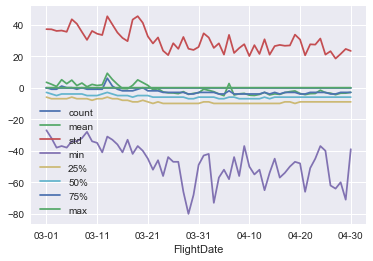

In [95]:
delays_per_day['count'] = delays_per_day['count'] / 1000
delays_per_day['max'] = delays_per_day['max'] / 150

delays_per_day.plot()

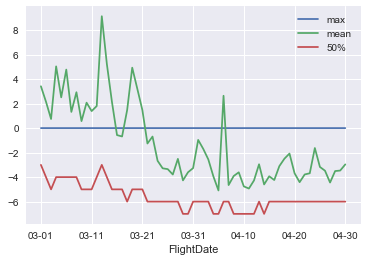

In [86]:
delays_per_day[['max', 'mean', '50%']].plot()

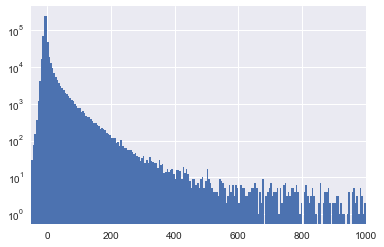

In [96]:
plt.hist(flights['DepDelay'].dropna(), bins= range(-50, 2500, 5));
plt.gca().set_xlim(-50, 1000)
plt.yscale('log')

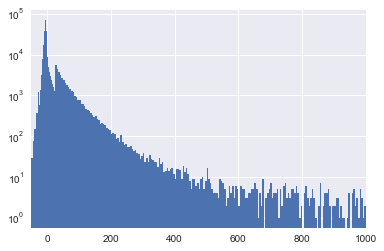

In [97]:
plt.hist(flights['DepDelay'].dropna(), bins=list(range(-50,-25, 5)) + list(range(-25, 25)) + list(range(25, 2500, 5)));
plt.gca().set_xlim(-50, 1000)
plt.yscale('log')

## Group-wise Operations and Transformations

### Apply: General split-apply-combine

In [98]:
flights.groupby('Tail_Number')[['Distance']]\
    .apply(lambda df: df['Distance'].max() - df['Distance'].min())

Tail_Number
215NV      733.0
216NV     1015.0
217NV     1148.0
218NV     1228.0
219NV      400.0
           ...  
N998JE    1437.0
N998NN    2113.0
N999DN     818.0
N999JB     125.0
N999JQ    1693.0
Length: 5561, dtype: float64

In [101]:
def sample_ten_percent(series):
    return series.sample(len(series) // 10)

stratified_sample = flights.groupby('Origin').apply(sample_ten_percent)
stratified_sample

FlightDate  DayOfWeek Reporting_Airline Tail_Number  \
Origin                                                               
ABE    565052  2020-03-02          1                OO      N921EV   
       269884  2020-03-01          7                G4       228NV   
       14133   2020-04-04          6                MQ      N663AR   
       272081  2020-03-07          6                G4       224NV   
       31927   2020-04-01          3                OH      N578NN   
...                   ...        ...               ...         ...   
YUM    520798  2020-03-10          2                OO      N606SK   
       43974   2020-04-07          2                OO      N761ND   
       42926   2020-04-04          6                OO      N759EV   
       522425  2020-03-11          3                OO      N745SK   
       299111  2020-04-01          3                YV         NaN   

               Flight_Number_Reporting_Airline Origin  \
Origin                                                  
ABE    565052                             4321    ABE   
       269884                             2635    ABE   
       14133                              4052    ABE   
       272081                              279    ABE   
       31927                              5314    ABE   
...                                        ...    ...   
YUM    520798                             2967    YUM   
       43974                              2967    YUM   
       42926                              2967    YUM   
       522425                             3029    YUM   
       299111                             5852    YUM   

                               OriginCityName OriginStateName  \
Origin                                                          
ABE    565052  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       269884  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       14133   Allentown/Bethlehem/Easton, PA    Pennsylvania   
       272081  Allentown/Bethlehem/Easton, PA    Pennsylvania   
       31927   Allentown/Bethlehem/Easton, PA    Pennsylvania   
...                                       ...             ...   
YUM    520798                        Yuma, AZ         Arizona   
       43974                         Yuma, AZ         Arizona   
       42926                         Yuma, AZ         Arizona   
       522425                        Yuma, AZ         Arizona   
       299111                        Yuma, AZ         Arizona   

               OriginCityMarketID Dest            DestCityName  \
Origin                                                           
ABE    565052               30135  DTW             Detroit, MI   
       269884               30135  SRQ  Sarasota/Bradenton, FL   
       14133                30135  ORD             Chicago, IL   
       272081               30135  PIE      St. Petersburg, FL   
       31927                30135  CLT           Charlotte, NC   
...                           ...  ...                     ...   
YUM    520798               33785  PHX             Phoenix, AZ   
       43974                33785  PHX             Phoenix, AZ   
       42926                33785  PHX             Phoenix, AZ   
       522425               33785  DFW   Dallas/Fort Worth, TX   
       299111               33785  PHX             Phoenix, AZ   

                DestStateName  DestCityMarketID  DepTime  DepDelay  AirTime  \
Origin                                                                        
ABE    565052        Michigan             31295    543.0      -2.0     88.0   
       269884         Florida             34986    726.0      11.0    130.0   
       14133         Illinois             30977   1458.0      -9.0     97.0   
       272081         Florida             33195    550.0     -10.0    128.0   
       31927   North Carolina             31057   1124.0     -11.0     65.0   
...                       ...               ...      ...       ...      ...   
YUM    520798         Ari

Suppresing the group keys

In [102]:
stratified_sample = flights.groupby('Origin', group_keys=False).apply(sample_ten_percent)
stratified_sample

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
65411,2020-04-12,7,OO,N8932C,4577,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,DTW,"Detroit, MI",Michigan,31295,1721.0,-14.0,74.0,425.0
14137,2020-04-08,3,MQ,N674RJ,4052,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,ORD,"Chicago, IL",Illinois,30977,1459.0,-8.0,110.0,654.0
25905,2020-04-13,1,OH,N575NN,5105,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,CLT,"Charlotte, NC",North Carolina,31057,558.0,-6.0,100.0,481.0
1136,2020-04-03,5,G4,NaN,2516,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,SAV,"Savannah, GA",Georgia,34685,NaN,NaN,NaN,669.0
533854,2020-03-13,5,OO,N455CA,4321,ABE,"Allentown/Bethlehem/Easton, PA",Pennsylvania,30135,DTW,"Detroit, MI",Michigan,31295,541.0,-4.0,85.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524091,2020-03-12,4,OO,N719SK,3100,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,1652.0,-1.0,31.0,160.0
454497,2020-03-14,6,YV,N905J,5852,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,1229.0,2.0,30.0,160.0
299060,2020-04-06,1,YV,NaN,5851,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,NaN,NaN,NaN,160.0
521662,2020-03-05,4,OO,N715SK,2994,YUM,"Yuma, AZ",Arizona,33785,PHX,"Phoenix, AZ",Arizona,30466,1020.0,28.0,31.0,160.0


### Quantile and bucket analysis

In [103]:
pd.cut(flights['Distance'], bins = (0, 100, 600, 10000))

0         (600, 10000]
1         (600, 10000]
2           (100, 600]
3           (100, 600]
4           (100, 600]
              ...     
313377    (600, 10000]
313378      (100, 600]
313379      (100, 600]
313380      (100, 600]
313381    (600, 10000]
Name: Distance, Length: 961611, dtype: category
Categories (3, interval[int64]): [(0, 100] < (100, 600] < (600, 10000]]

In [104]:
haul = pd.cut(flights['Distance'], bins = (0, 100, 600, 10000))

flights.groupby(haul)[['AirTime', 'DepDelay']]\
    .agg(['mean', 'median', 'std', 'count'])


AirTime                            DepDelay         \
                    mean median        std   count      mean median   
Distance                                                              
(0, 100]       23.501723   23.0   4.502007    9864 -0.241962   -6.0   
(100, 600]     59.579465   59.0  18.119129  324582 -0.191152   -5.0   
(600, 10000]  155.623871  137.0  64.716901  385804  0.700379   -5.0   

                                 
                    std   count  
Distance                         
(0, 100]      38.953161    9890  
(100, 600]    33.674868  325087  
(600, 10000]  33.084590  386679

__Exercise__

Show cities by descending number of airports

In [105]:
flights.sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
578037,2020-03-10,2,OO,N969SW,5996,DEN,"Denver, CO",Colorado,30325,GTF,"Great Falls, MT",Montana,31895,1128.0,-3.0,93.0,623.0
429316,2020-03-24,2,WN,N752SW,2031,SEA,"Seattle, WA",Washington,30559,OAK,"Oakland, CA",California,32457,1311.0,-4.0,100.0,672.0
270181,2020-03-27,5,G4,NaN,1819,PGD,"Punta Gorda, FL",Florida,34082,IND,"Indianapolis, IN",Indiana,32337,NaN,NaN,NaN,916.0
35992,2020-04-14,2,OH,N614NN,5444,SRQ,"Sarasota/Bradenton, FL",Florida,34986,CLT,"Charlotte, NC",North Carolina,31057,1659.0,-10.0,84.0,547.0
612519,2020-03-25,3,UA,NaN,812,CMH,"Columbus, OH",Ohio,31066,SFO,"San Francisco, CA",California,32457,NaN,NaN,NaN,2120.0


In [106]:
flights.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending=False).head(10)

OriginCityName
Washington, DC     2
Chicago, IL        2
Houston, TX        2
Mobile, AL         2
Phoenix, AZ        2
New York, NY       2
Columbus, OH       2
Garden City, KS    1
Fort Myers, FL     1
Fort Smith, AR     1
Name: Origin, dtype: int64

In [107]:
flights.groupby('OriginCityName').nunique()

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
OriginCityName,,,,,,,,,,,,,,,,
"Aberdeen, SD",61,7,1,55,2,1,1,1,1,1,1,1,55,28,16,1
"Abilene, TX",61,7,1,68,9,1,1,1,1,1,1,1,127,41,19,1
"Adak Island, AK",17,2,1,9,1,1,1,1,1,1,1,1,13,14,14,1
"Aguadilla, PR",36,7,3,115,9,1,1,1,4,4,3,3,109,59,66,4
"Akron, OH",61,7,8,267,26,1,1,1,11,11,9,10,252,83,103,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wilmington, NC",61,7,7,315,49,1,1,1,6,6,6,6,305,74,90,6
"Worcester, MA",59,7,2,85,4,1,1,1,4,4,3,4,83,41,68,4
"Wrangell, AK",61,7,1,11,2,1,1,1,2,2,1,2,72,51,23,2


In [108]:
flights[['OriginCityName', 'Origin']].drop_duplicates()\
    .groupby('OriginCityName').count().sort_values(by='Origin', ascending=False)

,Origin
OriginCityName,
"New York, NY",2
"Chicago, IL",2
"Mobile, AL",2
"Phoenix, AZ",2
"Columbus, OH",2
...,...
"Gainesville, FL",1
"Fresno, CA",1
"Fort Wayne, IN",1


The list above doesn't correspond to our intuitive expectation, probably. That is because airports serving the same general area may be located within several different city limits. This is encapsulated by the "market" concept in commercial aviation.

Find the 10 markets with the most airports, and which airports are included in them.

Hint: there is an aggregation that we haven't used yet that can come in really handy. Search for it in the [list of functions in groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)

In [109]:
flights[flights['OriginCityName'] == 'New York, NY'].sample(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
124568,2020-04-03,5,AA,NaN,2122,LGA,"New York, NY",New York,31703,BOS,"Boston, MA",Massachusetts,30721,NaN,NaN,NaN,184.0
481869,2020-03-16,1,YX,N871RW,6053,LGA,"New York, NY",New York,31703,CLT,"Charlotte, NC",North Carolina,31057,750.0,-10.0,97.0,544.0
283836,2020-03-27,5,MQ,NaN,3320,LGA,"New York, NY",New York,31703,ORD,"Chicago, IL",Illinois,30977,NaN,NaN,NaN,733.0
289861,2020-03-27,5,MQ,NaN,3546,LGA,"New York, NY",New York,31703,ROA,"Roanoke, VA",Virginia,34574,NaN,NaN,NaN,405.0
2994,2020-03-20,5,9E,N331PQ,4820,LGA,"New York, NY",New York,31703,PIT,"Pittsburgh, PA",Pennsylvania,30198,1725.0,-1.0,61.0,335.0


In [110]:
flights.groupby('OriginCityMarketID')['Origin'].nunique().sort_values(ascending=False)

OriginCityMarketID
31703    6
32575    5
30852    3
32457    3
30721    3
        ..
33277    1
33290    1
33304    1
33316    1
30070    1
Name: Origin, Length: 328, dtype: int64

In [111]:
%%time

flights.groupby('OriginCityMarketID')['Origin']\
       .agg(['nunique', 'unique'])\
       .sort_values(by='nunique', ascending=False)\
       .head(10)

CPU times: user 288 ms, sys: 1.18 ms, total: 289 ms
Wall time: 294 ms


,nunique,unique
OriginCityMarketID,,
31703,6,"[JFK, LGA, HPN, EWR, SWF, ISP]"
32575,5,"[LAX, ONT, SNA, BUR, LGB]"
32457,3,"[SFO, SJC, OAK]"
30852,3,"[DCA, IAD, BWI]"
30721,3,"[PVD, BOS, MHT]"
30977,2,"[ORD, MDW]"
30194,2,"[DFW, DAL]"
31453,2,"[IAH, HOU]"
32467,2,"[MIA, FLL]"


## Pivot tables and Cross-tabulation

In [113]:
flights.columns

Index(['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'Origin', 'OriginCityName',
       'OriginStateName', 'OriginCityMarketID', 'Dest', 'DestCityName',
       'DestStateName', 'DestCityMarketID', 'DepTime', 'DepDelay', 'AirTime',
       'Distance'],
      dtype='object')

In [114]:
flights.pivot_table(index='Reporting_Airline', columns='DayOfWeek', values='DepDelay')

DayOfWeek,1,2,3,4,5,6,7
Reporting_Airline,,,,,,,
9E,-1.707888,-2.419213,-1.649101,-1.063947,5.429478,-0.854762,-2.967217
AA,-0.224525,-0.559173,2.343172,1.606453,3.250790,0.469832,0.539833
AS,-3.028130,-3.333931,-3.049471,-3.571046,-0.464286,-0.625544,0.015668
B6,-0.271827,-2.905212,-1.211667,-3.060995,1.330606,1.251513,1.907815
DL,0.398689,-0.788563,2.626048,2.006141,2.021452,0.822409,0.357781
EV,-3.330180,-4.691929,-2.401846,-4.482199,-1.713975,-3.783871,-3.053221
F9,0.310252,-0.458415,-0.026334,0.439729,4.596370,1.902635,0.082505
G4,5.367169,-1.790609,0.089943,9.346806,7.529054,4.461660,4.709606
HA,-0.941385,8.142466,-1.621141,-2.818182,-2.800826,-2.882759,-3.590426


In [116]:
%%time
flights.pivot_table(index=['Reporting_Airline', 'Flight_Number_Reporting_Airline'], 
                    columns='DayOfWeek', 
                    values=['DepDelay', 'Distance'], 
                    aggfunc=['mean', 'std'])

CPU times: user 473 ms, sys: 6.67 ms, total: 480 ms
Wall time: 599 ms


mean             \
                                                    DepDelay              
DayOfWeek                                                  1          2   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                             -7.500000   0.500000   
                  4633                                   NaN        NaN   
                  4634                             -3.500000  -5.625000   
                  4635                             -6.500000 -10.000000   
...                                                      ...        ...   
YX                6139                             -5.666667  -4.833333   
                  6140                             -3.000000  16.000000   
                  6141                            -14.000000 -16.000000   
                  6142                             27.428571  -8.625000   
                  6143                             -9.000000  -9.000000   

                                                                         \
                                                                          
DayOfWeek                                                  3          4   
Reporting_Airline Flight_Number_Reporting_Airline                         
9E                4628                                   NaN        NaN   
                  4629                            -11.000000  -2.500000   
                  4633                                   NaN        NaN   
                  4634                             -6.000000  16.200000   
                  4635                             -8.000000 -22.000000   
...                                                      ...        ...   
YX                6139                             -6.833333  -8.250000   
                  6140                            -10.500000 -11.333333   
                  6141                            -10.500000 -10.333333   
                  6142                             -5.833333  -5.166667   
                  6143                            -11.000000  -7.500000   

                                                                            \
                                                                             
DayOfWeek                                               5     6          7   
Reporting_Airline Flight_Number_Reporting_Airline                            
9E                4628                                NaN   NaN        NaN   
                  4629                             -4.500 -10.0 -16.500000   
                  4633                                NaN   NaN        NaN   
                  4634                             -8.250  -6.5  -4.625000   
                  4635                             -7.500 -14.0  -9.500000   
...                                                   ...   ...        ...   
YX                6139                             -2.400  -7.0  11.250000   
                  6140                             31.000   NaN  -6.400000   
                  6141                             -0.500  -8.5  45.000000   
                  6142                             -0.375   7.8  -6.666667   
                  6143                             -5.500  -6.0        NaN   

                                                                           \
                                                     Distance               
DayOfWeek                                                   1           2   
Reporting_Airline Flight_Number_Reporting_Airline                           
9E                4628                             610.000000  610.000000   
                  4629                             500.000000  500.000000   
                  4633                                    NaN         NaN   
                  4634                             645.000000  645.000000   
                 

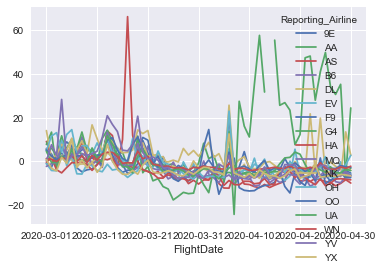

In [117]:
delays = flights.pivot_table(columns='Reporting_Airline', values='DepDelay', index=['FlightDate'])
delays.plot()